In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_json(r"C:\Users\farga\Downloads\OneDrive_2022-11-24\Data Science, Analytics, Engineering\loan_data.json")
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [ ]:
#1. percentage of total applicants for each value of dependents

In [3]:
depdf=df.groupby(["Dependents"]).count()

In [4]:
depdf["Application_ID"]=(depdf["Application_ID"]/len(df))*100

In [5]:
depdf=depdf["Application_ID"].astype(float)

In [6]:
depdf

Dependents
0     57.534247
1     16.634051
2     17.221135
3+     8.610568
Name: Application_ID, dtype: float64

In [ ]:
#2. percentage of applications approved for self employed applicants

In [7]:
df2=df.query("Self_Employed=='Yes'")

In [8]:
df2

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
5,LP001011,Male,Yes,2,Graduate,Yes,1,Urban,medium,Y
20,LP001066,Male,Yes,0,Graduate,Yes,1,Semiurban,medium,Y
25,LP001097,Male,No,1,Graduate,Yes,1,Rural,medium,N
36,LP001136,Male,Yes,0,Not Graduate,Yes,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
492,LP002931,Male,Yes,2,Graduate,Yes,1,Semiurban,medium,N
494,LP002938,Male,Yes,0,Graduate,Yes,1,Urban,high,Y
496,LP002941,Male,Yes,2,Not Graduate,Yes,1,Rural,medium,N
497,LP002945,Male,Yes,0,Graduate,Yes,1,Rural,medium,Y


In [9]:
df2.query("Application_Status=='Y'")

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
5,LP001011,Male,Yes,2,Graduate,Yes,1,Urban,medium,Y
20,LP001066,Male,Yes,0,Graduate,Yes,1,Semiurban,medium,Y
36,LP001136,Male,Yes,0,Not Graduate,Yes,1,Urban,medium,Y
60,LP001238,Male,Yes,3+,Not Graduate,Yes,1,Urban,medium,Y
63,LP001245,Male,Yes,2,Not Graduate,Yes,1,Semiurban,low,Y
66,LP001253,Male,Yes,3+,Graduate,Yes,1,Semiurban,medium,Y
72,LP001266,Male,Yes,1,Graduate,Yes,1,Semiurban,low,Y
97,LP001392,Female,No,1,Graduate,Yes,1,Semiurban,medium,Y
110,LP001482,Male,Yes,0,Graduate,Yes,1,Semiurban,low,Y


In [10]:
len(df2.query("Application_Status=='Y'"))/len(df2)*100

65.71428571428571

In [ ]:
#3. percentage of rejections for married male applicants

In [11]:
len(df.query("Gender=='Male' and Married=='Yes' and Application_Status=='N'"))/len(df)*100

17.025440313111545

In [ ]:
#4. which property area has the maximum approval ratio

In [12]:
df.query("Application_Status=='Y'")

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
5,LP001011,Male,Yes,2,Graduate,Yes,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
505,LP002974,Male,Yes,0,Graduate,No,1,Rural,low,Y
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y


In [13]:
df3 = df.groupby(["Property_Area"]).count()
df3

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Income,Application_Status
Property_Area,,,,,,,,,
Rural,149,149,149,149,149,149,149,149,149
Semiurban,197,197,197,197,197,197,197,197,197
Urban,165,165,165,165,165,165,165,165,165


In [14]:
df4 = df.query("Application_Status=='Y'").groupby("Property_Area").count()
df4

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Income,Application_Status
Property_Area,,,,,,,,,
Rural,90,90,90,90,90,90,90,90,90
Semiurban,153,153,153,153,153,153,153,153,153
Urban,104,104,104,104,104,104,104,104,104


In [15]:
approval_ratio = df4["Application_Status"]/df3["Application_Status"]
approval_ratio

Property_Area
Rural        0.604027
Semiurban    0.776650
Urban        0.630303
Name: Application_Status, dtype: float64

In [16]:
approval_ratio.index[approval_ratio.argmax()]

'Semiurban'

In [21]:
#5. average number of dependents per income group

In [17]:
df["Dependents"]=df["Dependents"].replace("3+","3").astype(int)
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [18]:
df6 = df.groupby(["Income"]).sum()/df.groupby(["Income"]).count()
df6["Dependents"]

Income
high      0.888889
low       0.641026
medium    0.922280
Name: Dependents, dtype: float64

In [ ]:
#6. approval ratio for various combinations of property area and marital status

In [42]:
df["Married"] = df["Married"].replace("Yes","Married").replace("No","Unmarried")
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,Unmarried,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Married,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Married,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Married,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,Unmarried,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,Unmarried,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Married,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Married,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Married,2,Graduate,No,1,Urban,medium,Y


In [27]:
df.groupby(["Property_Area","Married"],as_index=False)["Application_ID"].count()

,Property_Area,Married,Application_ID
0,Rural,Married,93
1,Rural,Unmarried,56
2,Semiurban,Married,129
3,Semiurban,Unmarried,68
4,Urban,Married,109
5,Urban,Unmarried,56


In [34]:
def samplefunction(df):
    res=pd.Series()
    res["a"] = df["Application_ID"].count()
    res["b"] = df.query("Application_Status=='Y'").count()["Application_Status"]/df.count()["Application_Status"]
    return res

In [35]:
df8 = df.groupby(["Property_Area","Married"],as_index=False).apply(samplefunction)
df8

C:\Users\farga\AppData\Local\Temp\ipykernel_12040\3693506281.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res=pd.Series()
C:\Users\farga\AppData\Local\Temp\ipykernel_12040\3693506281.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res=pd.Series()
C:\Users\farga\AppData\Local\Temp\ipykernel_12040\3693506281.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res=pd.Series()
C:\Users\farga\AppData\Local\Temp\ipykernel_12040\3693506281.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res=pd.Series()
C:\Users\farga\A

,Property_Area,Married,a,b
0,Rural,Married,93.0,0.602151
1,Rural,Unmarried,56.0,0.607143
2,Semiurban,Married,129.0,0.821705
3,Semiurban,Unmarried,68.0,0.691176
4,Urban,Married,109.0,0.678899
5,Urban,Unmarried,56.0,0.535714


In [ ]:
#7. create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score

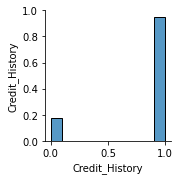

In [3]:
sns.pairplot(df)

In [4]:
df.dtypes

Application_ID        object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Credit_History         int64
Property_Area         object
Income                object
Application_Status    object
dtype: object

In [5]:
df_new = pd.get_dummies(df, columns=['Application_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Income'])

In [6]:
df_new.Application_Status.replace(('Y','N'), (1,0), inplace=True)

In [7]:
df_new.dtypes

Credit_History             int64
Application_Status         int64
Application_ID_LP001002    uint8
Application_ID_LP001003    uint8
Application_ID_LP001005    uint8
                           ...  
Property_Area_Semiurban    uint8
Property_Area_Urban        uint8
Income_high                uint8
Income_low                 uint8
Income_medium              uint8
Length: 531, dtype: object

In [8]:
print(df.shape)

(511, 10)


In [9]:
pd.crosstab(index=df["Education"], columns=df["Application_Status"])

Application_Status,N,Y
Education,,
Graduate,120,281
Not Graduate,44,66


<AxesSubplot:>

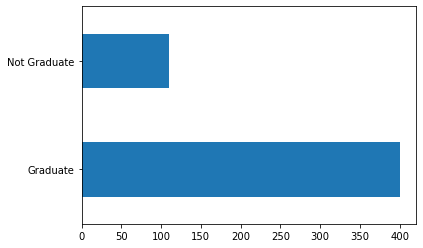

In [10]:
df.Education.value_counts().plot(kind="barh")

In [41]:
df_y = pd.DataFrame(df_new["Application_Status"])
df_x = df_new.drop(["Application_Status"], axis=1)
print(df_x.columns)
print(df_y.columns)

Index(['Credit_History', 'Application_ID_LP001002', 'Application_ID_LP001003',
       'Application_ID_LP001005', 'Application_ID_LP001006',
       'Application_ID_LP001008', 'Application_ID_LP001011',
       'Application_ID_LP001013', 'Application_ID_LP001014',
       'Application_ID_LP001018',
       ...
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Income_high', 'Income_low', 'Income_medium'],
      dtype='object', length=530)
Index(['Application_Status'], dtype='object')


In [42]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=2, stratify=df_y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(357, 530)
(154, 530)
(357, 1)
(154, 1)


In [46]:
clf = LogisticRegression()

In [47]:
clf.fit(x_train, y_train)

C:\Users\farga\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
df_pred = clf.predict(x_test)

In [56]:
accuracy_score(y_test, df_pred)

0.8246753246753247

In [54]:
df_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)